<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/YB_5_16_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [3]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [4]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA YB/dataset/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [6]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [7]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=156)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [9]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [18]:
#릿지모델 생성 및 훈련
Ridge_reg=Ridge(alpha=0.3)
Ridge_reg.fit(X_train,y_train)

#예측값 구하기
Ridge_pred=Ridge_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age_ridge=Ridge_pred+1.5

real_age=y_test+1.5

#MSE와 RMSE구하기
mse=mean_squared_error(real_age,pred_age_ridge)
rmse=np.sqrt(mse)

print('MSE:',np.round(mse,4))
print('RMSE:',np.round(rmse,4))

MSE: 4.9222
RMSE: 2.2186


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [19]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [20]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
from sklearn.model_selection import cross_val_score

for alpha in alphas:
  model=Ridge(alpha=alpha)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  rmse_list=np.sqrt(-cross_val_score(model,X,y,
                                     scoring='neg_mean_squared_error',cv=5))
  rmse_avg=np.mean(rmse_list)
  print('Alpha:',alpha)
  print('{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__,np.round(rmse_list,3)))
  print('{0} CV 평균 RMSE 값: {1}\n'.format(model.__class__.__name__,np.round(rmse_avg,3)))

Alpha: 0
Ridge CV RMSE 값 리스트: [3.135 1.735 2.411 1.946 1.996]
Ridge CV 평균 RMSE 값: 2.245

Alpha: 0.1
Ridge CV RMSE 값 리스트: [3.134 1.724 2.393 1.941 1.994]
Ridge CV 평균 RMSE 값: 2.237

Alpha: 1
Ridge CV RMSE 값 리스트: [3.185 1.701 2.352 1.921 1.993]
Ridge CV 평균 RMSE 값: 2.23

Alpha: 10
Ridge CV RMSE 값 리스트: [3.455 1.739 2.476 1.965 2.052]
Ridge CV 평균 RMSE 값: 2.337

Alpha: 100
Ridge CV RMSE 값 리스트: [3.842 2.007 2.778 2.23  2.249]
Ridge CV 평균 RMSE 값: 2.621



alpha = 1

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [17]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [21]:
#모델 생성 및 훈련
xgb_reg=XGBRegressor()
xgb_reg.fit(X_train,y_train)

#예측값 구하기
xgb_pred=xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age_xgb=xgb_pred+1.5

#MSE와 RMSE 구하기

mse=mean_squared_error(real_age,pred_age_xgb)
rmse=np.sqrt(mse)

print('MSE:',np.round(mse,4))
print('RMSE:',np.round(rmse,4))

MSE: 5.3431
RMSE: 2.3115


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

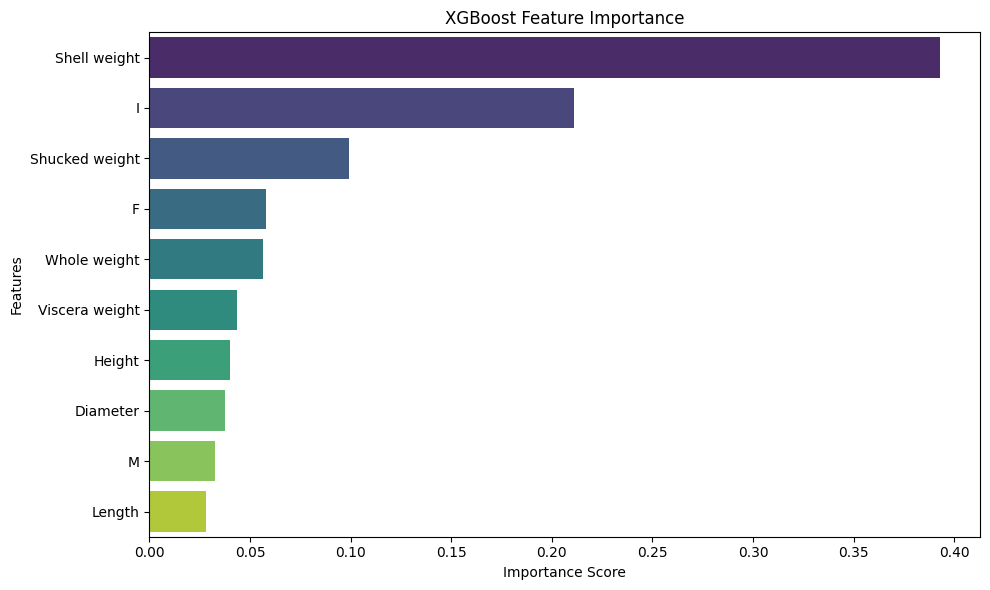

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances=xgb_reg.feature_importances_

importance_df=pd.Series(feature_importances, index=data.columns)
importance_df=importance_df.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance_df.values, y=importance_df.index, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [32]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [34]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape)
print(y_train.shape)

(124, 13)
(124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [37]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [48]:
#기울기
print(lr.coef_)

[[-1.99751338e-01  3.65451144e-01  1.49472353e-01 -1.88027194e-01
  -2.28494592e-02  1.95456785e-01  4.66701970e-01 -1.66796877e-02
   8.23898405e-02  6.75013134e-02 -1.92622072e-02  2.94916201e-01
   7.42522347e-03]
 [ 5.96476523e-01 -7.88673910e-01 -1.26181652e-01  2.12254429e-01
  -1.13504086e-02  3.15786394e-01  3.55148523e-01  3.34675938e-02
   2.79036084e-01 -1.17202662e+00  2.61166065e-01  4.64732238e-01
  -8.33633769e-03]
 [-3.96725185e-01  4.23222765e-01 -2.32907005e-02 -2.42272356e-02
   3.41998678e-02 -5.11243179e-01 -8.21850494e-01 -1.67879061e-02
  -3.61425924e-01  1.10452531e+00 -2.41903857e-01 -7.59648438e-01
   9.11114220e-04]]


In [49]:
#절편
print(lr.intercept_)

[-0.04177842  0.09551058 -0.05373216]


3-3) 모델의 정확도를 구하세요.

In [54]:
from sklearn.metrics import accuracy_score

#모델의 예측값 구하기
pred_age_lr=lr.predict(x_test)

#모델의 정확도 구하기
acc=accuracy_score(y_test,pred_age_lr)
print(np.round(acc,4))

0.963
